In [1]:
from math import pi, sin, cos, acos, floor
import random
import matplotlib
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import io
import sys

sys.path.append('scripts/ch04')
from vectors import *
from transformations import *
import display3d as d3
import load_off as ld

pygame 2.0.1 (SDL 2.0.14, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
teapot_vertices, teapot_faces = ld.load_off_file('scripts/ch04/teapot.off')
light = (1, 2, 3)
teapot_model = ld.create_3d_model(teapot_vertices, teapot_faces)

display_properties = d3.DisplayProperties(
    scene=d3.Scene(
        translate=(-0.5, 0.0, -5.0),
        rotate=d3.Rotation(
            initial=-90.0,
            axis=(1.0, 0.0, 0.0)
        )
    )
)

d3.display_in_window(teapot_model, light, display_properties)
d3.display_in_window(teapot_model, light)

In [3]:
teapot_model_x2 = map_to_polygons(scale_by(2.0), teapot_model)

d3.display_in_window(teapot_model_x2, light, display_properties)

In [4]:
teapot_model_4x_moved = map_to_polygons(compose(scale_by(4.0), translate_by((-1.5, 0, -2.5))), teapot_model)

d3.display_in_window(teapot_model_4x_moved, light, display_properties)

In [5]:
def center(vertices):
    #https://docs.python.org/3.4/faq/programming.html#why-do-lambdas-defined-in-a-loop-with-different-values-all-return-the-same-result
    keys = [(lambda vertex, index=i : vertex[index]) for i in range(3)]
    
    min_xyz = (
        min(vertices, key=keys[0])[0],
        min(vertices, key=keys[1])[1],
        min(vertices, key=keys[2])[2]
    )
    max_xyz = (
        max(vertices, key=keys[0])[0],
        max(vertices, key=keys[1])[1],
        max(vertices, key=keys[2])[2]
    )

    return scale(0.5, add(min_xyz, max_xyz))


teapot_model_rotated = map_to_polygons(
    compose(
        translate_by(scale(-1.0, center(teapot_vertices))),
        rotate_z_by(-pi / 3),
        rotate_x_by(-pi / 2)
    ),
    teapot_model
)

d3.display_in_window(teapot_model_rotated, light)

In [6]:
teapot_model_away = map_to_polygons(
    compose(
        translate_by(scale(-1.0, center(teapot_vertices))),
        rotate_x_by(-pi / 2),
        translate_by((0, 0, -20))
    ),
    teapot_model
)

d3.display_in_window(teapot_model_away, light)

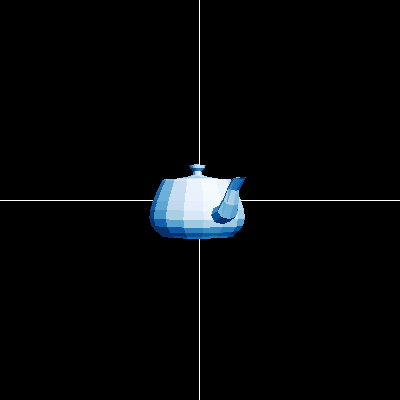

In [7]:
image = d3.render_image(teapot_model_rotated, light)
IPython.display.display(image)